In [1]:
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd

/home/raven/anaconda3/envs/kawuma/lib/python3.13/site-packages/xgboost/core.py:377: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc >= 2.28) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


In [2]:
# Load dataset
data_df = pd.read_csv("/home/raven/Kawuma/Failure Predictor/datasets/Summary_data_system_Failures.csv")
data_df.describe()

,year,Application,Admision,Academic,student Portal
count,24.000000,21.000000,22.000000,20.000000,20.000000
mean,2009.541667,54.619048,80.318182,94.900000,82.100000
std,8.792186,17.599648,21.234263,5.046103,13.916669
min,1996.000000,27.000000,0.000000,84.000000,50.000000
25%,2002.750000,38.000000,75.000000,91.500000,75.000000
50%,2008.500000,57.000000,80.000000,95.500000,82.500000
75%,2018.250000,62.000000,93.750000,100.000000,91.750000
max,2024.000000,100.000000,100.000000,100.000000,100.000000


In [3]:
# Clean the dataset first
data_df.dropna(how='all', inplace=True)
data_df.fillna(data_df.mean(numeric_only=True), inplace=True)

clean_df = data_df.sort_values("year").reset_index(drop=True)

print("Cleaned dataset shape:", clean_df.shape)
print(clean_df.isna().sum())

Cleaned dataset shape: (24, 5)
year              0
Application       0
Admision          0
Academic          0
student Portal    0
dtype: int64


In [4]:
# Split the dataset
X = clean_df["year"].values.reshape(-1, 1)

targets = [col for col in clean_df.columns if col != "year"]
print("Target columns:", targets)


Target columns: ['Application ', 'Admision ', 'Academic', 'student Portal']


In [ ]:
# Train xgboost regression models and predict future failures

models = {}
future_years = np.arange(2026, 2036).reshape(-1, 1)
future_predictions = {}
alpha = 0.7

for target in targets:
    xgb_model = XGBRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=4,
        subsample=0.9,
        colsample_bytree=0.9,
        random_state=42
    )
    xgb_model.fit(X, clean_df[target])

    # Linear Regression Model
    lin_model = LinearRegression()
    lin_model.fit(X, clean_df[target])


    models[target] = model
    future_predictions[target] = model.predict(future_years)



In [7]:
forecast_df = pd.DataFrame({"Year": future_years.flatten()})
for target in targets:
    forecast_df[target] = future_predictions[target].round(2)

print("Forecast for 2026–2035:")
print(forecast_df)

# Save to CSV
forecast_df.to_csv("AIMS_XGBoost_Failure_Forecast_2026_2035.csv", index=False)


Forecast for 2026–2035:
   Year  Application   Admision    Academic  student Portal
0  2026     55.209999  74.150002  94.940002       75.300003
1  2027     55.209999  74.150002  94.940002       75.300003
2  2028     55.209999  74.150002  94.940002       75.300003
3  2029     55.209999  74.150002  94.940002       75.300003
4  2030     55.209999  74.150002  94.940002       75.300003
5  2031     55.209999  74.150002  94.940002       75.300003
6  2032     55.209999  74.150002  94.940002       75.300003
7  2033     55.209999  74.150002  94.940002       75.300003
8  2034     55.209999  74.150002  94.940002       75.300003
9  2035     55.209999  74.150002  94.940002       75.300003


In [9]:
for target in targets:
    y_true = clean_df[target]
    y_pred = models[target].predict(X)
    print(f"{target} R² Score: {r2_score(y_true, y_pred):.4f}")
    print(f"{target} MAE Score: {mean_squared_error(y_true, y_pred):.4f}\n")


Application  R² Score: 0.9988
Application  MAE Score: 0.2993

Admision  R² Score: 0.9995
Admision  MAE Score: 0.1816

Academic R² Score: 0.9998
Academic MAE Score: 0.0050

student Portal R² Score: 0.9992
student Portal MAE Score: 0.1199



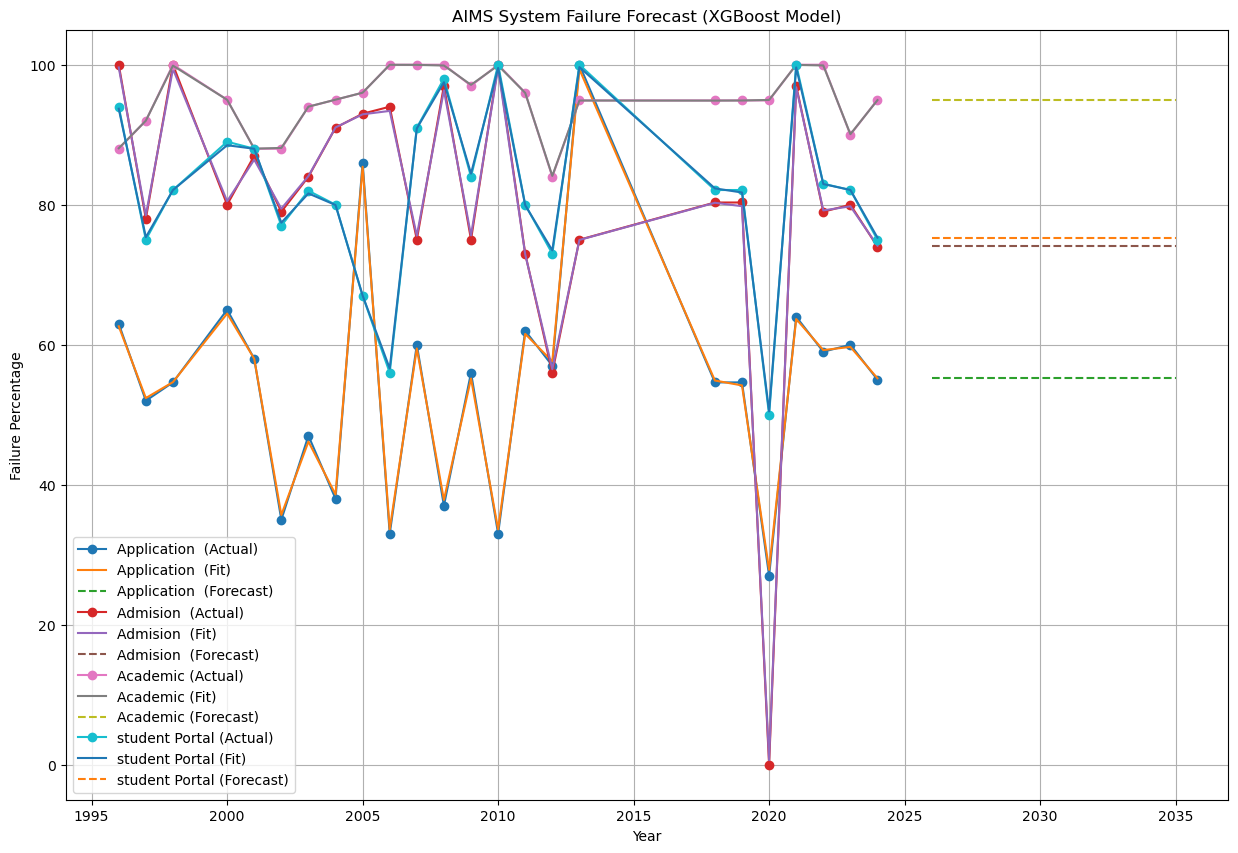

In [13]:
plt.figure(figsize=(15, 10))

for target in targets:
    plt.plot(clean_df["year"], clean_df[target], 'o-', label=f"{target} (Actual)")
    plt.plot(clean_df["year"], models[target].predict(X), '-', label=f"{target} (Fit)")
    plt.plot(future_years, future_predictions[target], '--', label=f"{target} (Forecast)")

plt.xlabel("Year")
plt.ylabel("Failure Percentage")
plt.title("AIMS System Failure Forecast (XGBoost Model)")
plt.legend()
plt.grid(True)
plt.show()
